In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
import cv2
from scipy import ndimage
from skimage import measure
from skimage import util
from pylab import *
import itertools
import argparse
import imutils

In [91]:
image = cv2.imread("test.png")
# image = cv2.imread('perfect_outline/roof1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

## Find contours

In [97]:
print(gray.dtype)
print(gray.max())
print(gray.min())

uint8
255
0


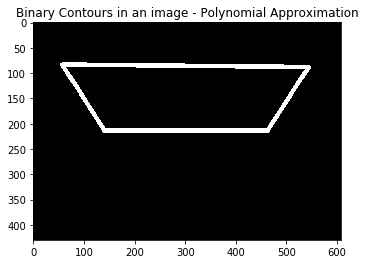

In [94]:
_, contours, _ = cv2.findContours(gray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
black = np.zeros_like(image)
for cnt in contours:
    epsilon = 0.01*cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)  # approximate corner points in polygon
    lines = cv2.drawContours(black, [approx], 0, (255, 255, 255), 7)
    
plt.figure("Example 2")
plt.imshow(lines)
plt.title("Binary Contours in an image - Polynomial Approximation")
plt.show()

In [95]:
lines

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

## Find contour box

In [67]:
# for cnt in contours:
#     rect = cv2.minAreaRect(cnt)
#     box = cv2.boxPoints(rect)
#     box = np.int0(box)
#     image = cv2.drawContours(image, [box], 0, (0, 255, 0), 3)

# plt.figure("Example 1")
# plt.imshow(image)
# plt.title("Binary Contours in an image")
# plt.show()

## Using skimage

In [2]:
# from skimage import measure
# contours = measure.find_contours(image, 0.8)

# black = np.zeros_like(image)

# fig, ax = plt.subplots()
# ax.imshow(black, interpolation='nearest', cmap=plt.cm.gray)

# for n, contour in enumerate(contours):
#     a = ax.plot(contour[:, 1], contour[:, 0], color='white', linewidth=5)

In [ ]:
points = "points_select" # points layer
sr = arcpy.Describe(points).spatialReference # get CRS
lines = "roads_select" # roads feature class containing single, merged feature for all roads
out_lines = [] # output list
line_geom = [i[0] for i in arcpy.da.SearchCursor(lines,'SHAPE@',spatial_reference=sr)] # the road feature
with arcpy.da.SearchCursor(points,'SHAPE@') as cursor: # loop through points
for row in cursor:
    end = line_geom[0].queryPointAndDistance(row[0])[0].centroid # get nearest point on line
    start = row[0].centroid 
    out_lines.append(arcpy.Polyline(arcpy.Array([start,end]),sr)) # connect the dots and add to line list
    arcpy.CopyFeatures_management(out_lines,r'in_memory\out_lines') # write line list to disk